In [1]:
%cd ..
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from melp import Detector
import melp
import math
import random
from glob import glob

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
#from melp import TileAnalyzer
import melp.clustering.spatial_cluster as sclump
import melp.clustering.plots as clump_plt
import melp.clustering.three_frame_cluster as clump_3

plt.rcParams.update({'font.size': 16})

/home/erik/GitHub/melp
Welcome to JupyROOT 6.24/06


## Time then iterative spatial clustering

In [2]:
time_threshold_used = 1.2
threshold_cluster_width_used = 20 

function_str = "mt_compare_to_tid"
src = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args = (time_threshold_used, threshold_cluster_width_used, "big", None, "timetheniterativespatial")

#clump.multithreading.run_mt(function_str, src, args)

In [3]:
src_res = "./melp/clustering/results"

src_frac_corr_frame          = src_res + "/frac_corr_frame_tid_*_timetheniterativespatial.txt"
src_frac_corr_clusters_frame = src_res + "/frac_corr_clusters_frame_tid_*_timetheniterativespatial.txt"
src_frac_uncorr_frame        = src_res + "/frac_uncorr_frame_tid_*_timetheniterativespatial.txt"
src_efficiency_stats         = src_res + "/efficiency_stats_tid_*_timetheniterativespatial.txt"

fnames_frac_corr_frame           = glob(src_frac_corr_frame)
fnames_frac_corr_clusters_frame  = glob(src_frac_corr_clusters_frame)
fnames_frac_uncorr_frame         = glob(src_frac_uncorr_frame)
fnames_efficiency_stats          = glob(src_efficiency_stats)

array_frac_corr_frame          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame])
array_frac_corr_clusters_frame = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame])
array_frac_uncorr_frame        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

### Efficiency statistics

In [4]:
for f in fnames_efficiency_stats:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_tid_138_timetheniterativespatial.txt
Number of analyzed frames:  199841 Number of correct counter fractions:  199840
Total number of hits = 6211911 , Identified correctly + identified incorrectly = 5100738
Identified correctly: 4635934
Identified incorrectly: 464804
Total #hits in frames/#hits in clusters =  1.2178455352931281
Total number of clusters: 3296848 , Hits: 6211911
Number of clusters with hits that are far apart in time: 5938
Number of clusters where tid already exists: 1688710 , Hits: 2584626
Number of clusters where tid already exists, that are accounted for: 1688710
Correctly associated out of all hits:  74.62975564202385 %
Correctly associated out of all hits in clusters:  90.88751470865589 %
Incorrectly associated out of all hits:  7.482463930986777 %
Incorrectly associated out of all hits in clusters:  9.112485291344116 %


File: ./melp/clustering/results/efficiency_stats_tid_151_timetheniterativespatial.txt
Number of an

### Efficiency plots

#### Hits associated to wrong cluster

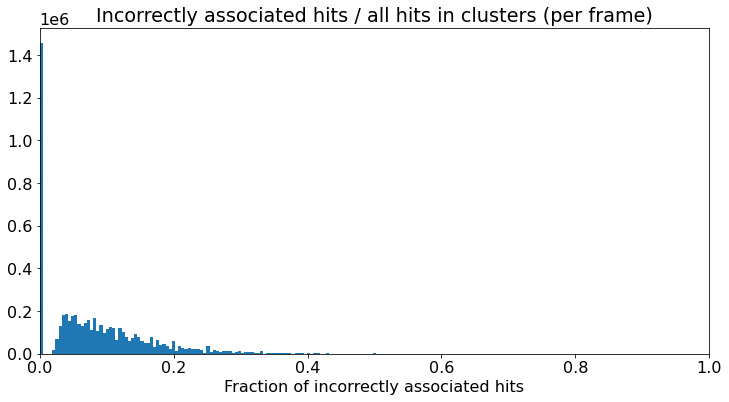

In [5]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame, bins = 500)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of incorrectly associated hits")
plt.show()

#### Hits associated to correct cluster

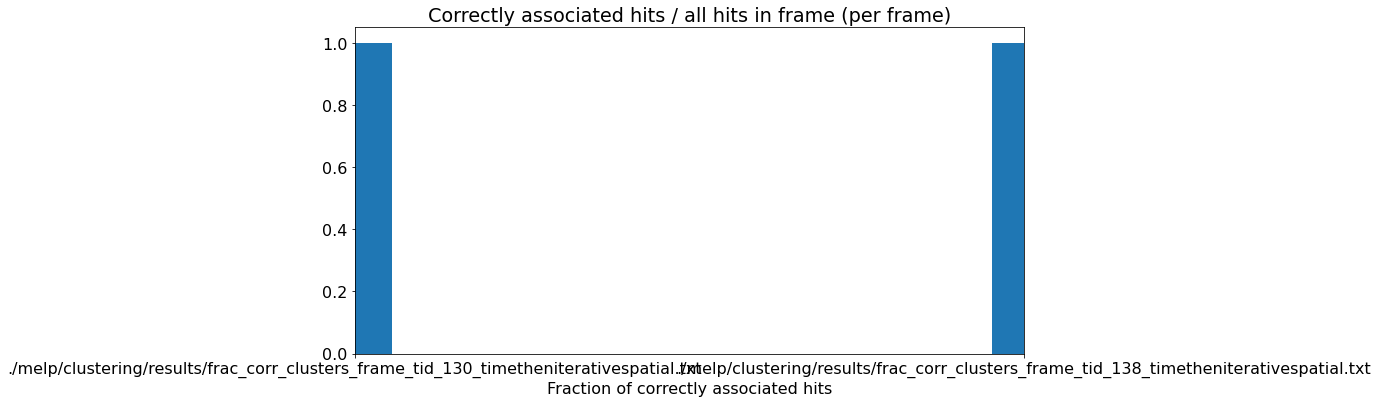

In [36]:
fig = plt.figure(figsize=(12,6))
plt.hist(fnames_frac_corr_clusters_frame, bins = 500)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of correctly associated hits")
plt.show()

#### Combined histograms

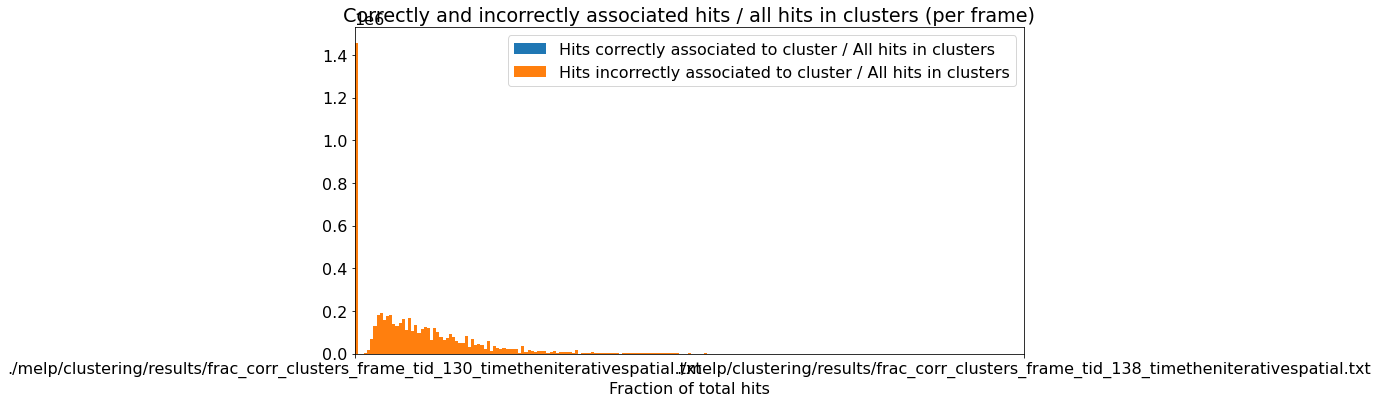

In [7]:
fig = plt.figure(figsize=(12,6))
plt.hist(fnames_frac_corr_clusters_frame, bins = 500, label = "Hits correctly associated to cluster / All hits in clusters")
plt.hist(array_frac_uncorr_frame, bins = 500, label = "Hits incorrectly associated to cluster / All hits in clusters")
plt.title("Correctly and incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of total hits")
plt.legend()
#plt.savefig("Corr_and_incorr_fractions_hist.png", dpi = 300)
plt.show()

### Efficiency vs maximum cluster width

In [8]:
function_str = "mt_efficiency_as_function_of_cluster_width"
cluster_width_array_used = np.arange(10,101,1)
filename_used = "./testdata/sorted/root_files_fixed/mu3e_sorted_000127.root"
args = (filename_used, time_threshold_used, "big", None, None, "timetheniterativespatial")

#clump.multithreading.run_mt(function_str, src, args, cluster_width_array = cluster_width_array_used)

In [9]:
src_cluster_width    = src_res + "/efficiency_vs_cluster_width_*_timetheniterativespatial.txt"
fnames_cluster_width = glob(src_cluster_width)

array_cluster_width_eff  = []
array_cluster_width      = []
array_cluster_width_tmp  = []
array_cluster_width_tmp.append([np.loadtxt(f) for f in fnames_cluster_width])
for i in array_cluster_width_tmp[0]:
    array_cluster_width_eff.append(float(i[0]))
    array_cluster_width.append(float(i[1]))

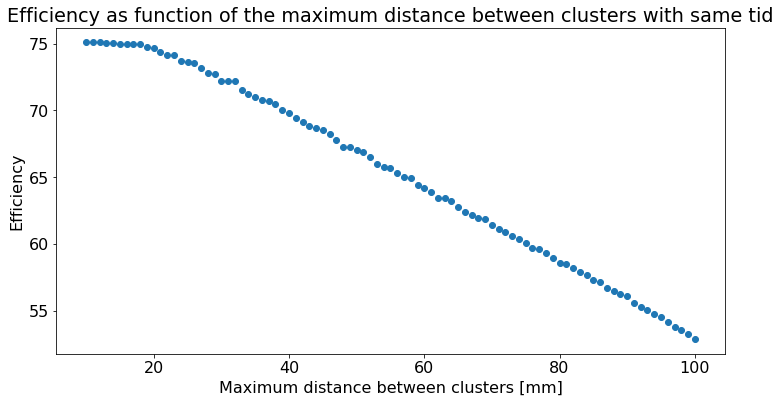

In [10]:
fig = plt.figure(figsize=(12,6))
plt.scatter(array_cluster_width, array_cluster_width_eff)
plt.xlabel("Maximum distance between clusters [mm]")
plt.ylabel("Efficiency")
plt.title("Efficiency as function of the maximum distance between clusters with same tid")
plt.savefig("efficiency_vs_max_distance_threshold_10-100_1_all_frames_each_correct.png", dpi=300)
plt.show()

### Fraction of truth clusters bigger than threshold

In [11]:
function_str = "mt_frac_truth_cluster_size_filename"
cluster_width_array_used = np.arange(10,101,1)
filename_used = "/home/erik/GitHub/melp/testdata/sorted/root_files_fixed/mu3e_sorted_000127.root"
args = (filename_used, "big", None, None)

#clump.multithreading.run_mt(function_str, src, args, cluster_width_array = cluster_width_array_used)

In [12]:
src_frac_cluster_over    = src_res + "/frac_truth_Cluster_size_*.txt"
fnames_frac_cluster_over = glob(src_frac_cluster_over)

array_fractions_tmp = []
array_fractions = []
array_thresholds = []
array_fractions_tmp.append([np.loadtxt(f) for f in fnames_frac_cluster_over])
for i in array_fractions_tmp[0]:
    array_fractions.append(float(i[0]))
    array_thresholds.append(float(i[1]))

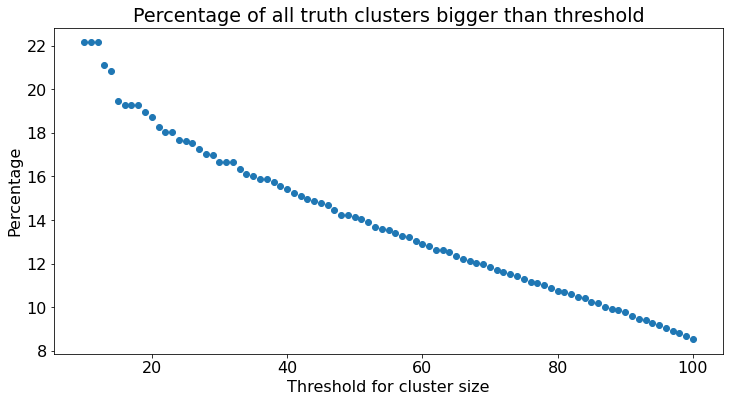

In [13]:
fig = plt.figure(figsize=(12,6))
plt.scatter(array_thresholds, array_fractions)
plt.xlabel("Threshold for cluster size")
plt.ylabel("Percentage")
plt.title("Percentage of all truth clusters bigger than threshold")
plt.savefig("percentage_truth_clusters_over_threshold_all_30_files.png", dpi=300)
plt.show()

## Pure time clustering

In [14]:
time_threshold_used = 0.4
threshold_cluster_width_used = 20 

function_str = "mt_compare_to_tid"
src_time = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args_time = (time_threshold_used, threshold_cluster_width_used, "big", None, "time")

#clump.multithreading.run_mt(function_str, src_time, args_time)

In [15]:
src_frac_corr_frame_time          = src_res + "/frac_corr_frame_tid_*_time.txt"
src_frac_corr_clusters_frame_time = src_res + "/frac_corr_clusters_frame_tid_*_time.txt"
src_frac_uncorr_frame_time        = src_res + "/frac_uncorr_frame_tid_*_time.txt"
src_efficiency_stats_time         = src_res + "/efficiency_stats_tid_*_time.txt"

fnames_frac_corr_frame_time           = glob(src_frac_corr_frame_time)
fnames_frac_corr_clusters_frame_time  = glob(src_frac_corr_clusters_frame_time)
fnames_frac_uncorr_frame_time         = glob(src_frac_uncorr_frame_time)
fnames_efficiency_stats_time          = glob(src_efficiency_stats_time)

array_frac_corr_frame_time          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame_time])
array_frac_corr_clusters_frame_time = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame_time])
array_frac_uncorr_frame_time        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame_time])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

### Efficiency statistics

In [16]:
for f in fnames_efficiency_stats_time:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_tid_138_time.txt
Number of analyzed frames:  199841 Number of correct counter fractions:  199840
Total number of hits = 6211911 , Identified correctly + identified incorrectly = 6211911
Identified correctly: 4916107
Identified incorrectly: 1295804
Total #hits in frames/#hits in clusters =  1.0
Total number of clusters: 2853370 , Hits: 6211911
Number of clusters with hits that are far apart in time: 0
Number of clusters where tid already exists: 777968 , Hits: 1774985
Number of clusters where tid already exists, that are accounted for: 777968
Correctly associated out of all hits:  79.14001021585788 %
Correctly associated out of all hits in clusters:  79.14001021585788 %
Incorrectly associated out of all hits:  20.85998978414211 %
Incorrectly associated out of all hits in clusters:  20.85998978414211 %


File: ./melp/clustering/results/efficiency_stats_tid_141_time.txt
Number of analyzed frames:  199841 Number of correct counter fractions:

### Efficiency plots

#### Hits associated to wrong cluster

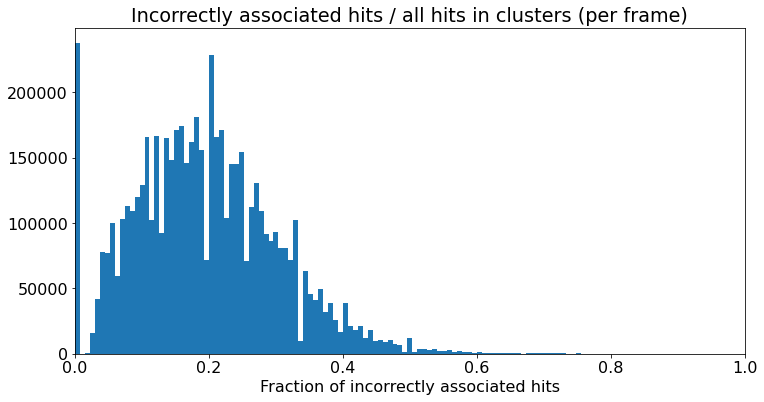

In [38]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame_time, bins = 300)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of incorrectly associated hits")
plt.savefig("incorr_associated_all_30_files_time.png", dpi = 300)
plt.show()

#### Hits associated to correct cluster

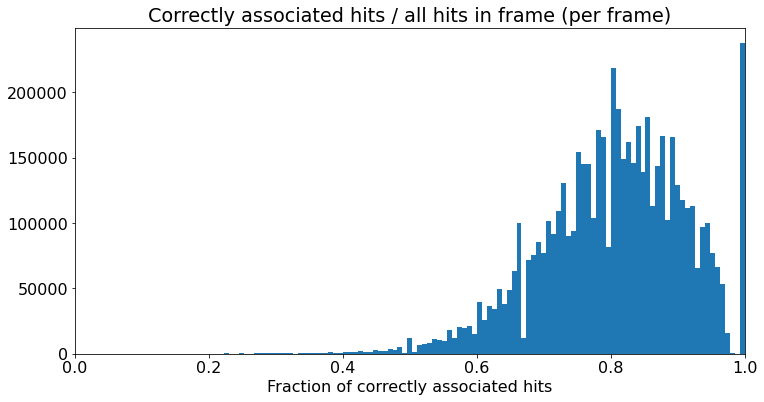

In [39]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame_time, bins = 300)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of correctly associated hits")
plt.savefig("corr_associated_all_30_files_time.png", dpi = 300)

plt.show()

#### Combined histograms

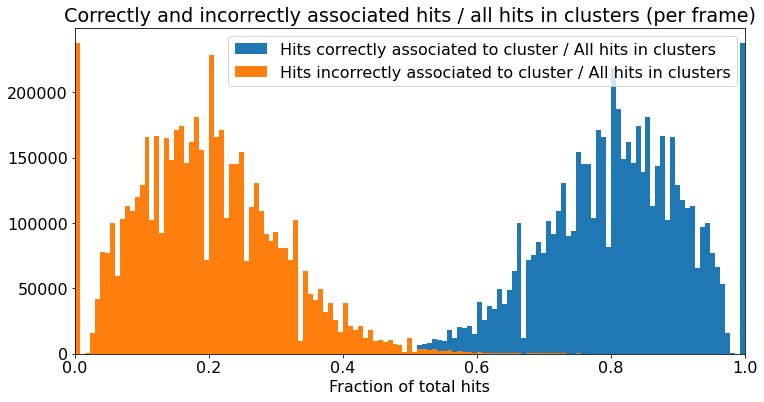

In [41]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame_time, bins = 300, label = "Hits correctly associated to cluster / All hits in clusters")
plt.hist(array_frac_uncorr_frame_time, bins = 300, label = "Hits incorrectly associated to cluster / All hits in clusters")
plt.title("Correctly and incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of total hits")
plt.legend()
plt.savefig("Corr_and_incorr_fractions_all_30_files_time.png", dpi = 300)
plt.show()

### Efficiency vs maximum cluster width

In [20]:
function_str = "mt_efficiency_as_function_of_cluster_width"
cluster_width_array_used = np.arange(10,101,1)
filename_used = "./testdata/sorted/root_files_fixed/mu3e_sorted_000127.root"
args_time = (filename_used, time_threshold_used, "big", None, None, "time")

#clump.multithreading.run_mt(function_str, src_time, args_time, cluster_width_array = cluster_width_array_used)

In [21]:
src_cluster_width_time    = src_res + "/efficiency_vs_cluster_width_*_time.txt"
fnames_cluster_width_time = glob(src_cluster_width_time)

array_cluster_width_eff_time  = []
array_cluster_width_time = []
array_cluster_width_tmp_time = []
array_cluster_width_tmp_time.append([np.loadtxt(f) for f in fnames_cluster_width_time])
for i in array_cluster_width_tmp_time[0]:
    array_cluster_width_eff_time.append(float(i[0]))
    array_cluster_width_time.append(float(i[1]))

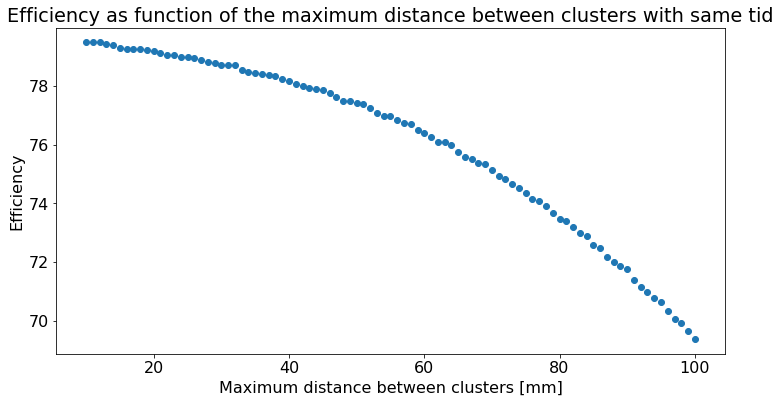

In [42]:
fig = plt.figure(figsize=(12,6))
plt.scatter(array_cluster_width_time, array_cluster_width_eff_time)
plt.xlabel("Maximum distance between clusters [mm]")
plt.ylabel("Efficiency")
plt.title("Efficiency as function of the maximum distance between clusters with same tid")
plt.savefig("efficiency_vs_max_distance_threshold_10-100_1_all_frames_each_correct_time.png", dpi=300)
plt.show()

## Pure spatial clustering

In [23]:
time_threshold_used = 0.4
threshold_cluster_width_used = 20 

function_str = "mt_compare_to_tid"
src_spatial = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args_spatial = (time_threshold_used, threshold_cluster_width_used, "big", None, "iterativespatial")

#clump.multithreading.run_mt(function_str, src_spatial, args_spatial)

In [24]:
src_frac_corr_frame_spatial          = src_res + "/frac_corr_frame_tid_*_iterativespatial.txt"
src_frac_corr_clusters_frame_spatial = src_res + "/frac_corr_clusters_frame_tid_*_iterativespatial.txt"
src_frac_uncorr_frame_spatial        = src_res + "/frac_uncorr_frame_tid_*_iterativespatial.txt"
src_efficiency_stats_spatial         = src_res + "/efficiency_stats_tid_*_iterativespatial.txt"

fnames_frac_corr_frame_spatial           = glob(src_frac_corr_frame_spatial)
fnames_frac_corr_clusters_frame_spatial  = glob(src_frac_corr_clusters_frame_spatial)
fnames_frac_uncorr_frame_spatial         = glob(src_frac_uncorr_frame_spatial)
fnames_efficiency_stats_spatial          = glob(src_efficiency_stats_spatial)

array_frac_corr_frame_spatial          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame_spatial])
array_frac_corr_clusters_frame_spatial = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame_spatial])
array_frac_uncorr_frame_spatial        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame_spatial])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

### Efficiency statistics

In [25]:
for f in fnames_efficiency_stats_spatial:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_tid_160_iterativespatial.txt
Number of analyzed frames:  199841 Number of correct counter fractions:  199838
Total number of hits = 6210004 , Identified correctly + identified incorrectly = 6209983
Identified correctly: 5325417
Identified incorrectly: 884566
Total #hits in frames/#hits in clusters =  1.0000033816517695
Total number of clusters: 0 , Hits: 6210004
Number of clusters with hits that are far apart in time: 168593
Number of clusters where tid already exists: 0 , Hits: 0
Number of clusters where tid already exists, that are accounted for: 0
Correctly associated out of all hits:  85.75545200937069 %
Correctly associated out of all hits in clusters:  85.7557420044467 %
Incorrectly associated out of all hits:  14.244209826595924 %
Incorrectly associated out of all hits in clusters:  14.244257995553289 %


File: ./melp/clustering/results/efficiency_stats_tid_138_iterativespatial.txt
Number of analyzed frames:  199841 Number of corr

### Efficiency plots

#### Hits associated to wrong cluster

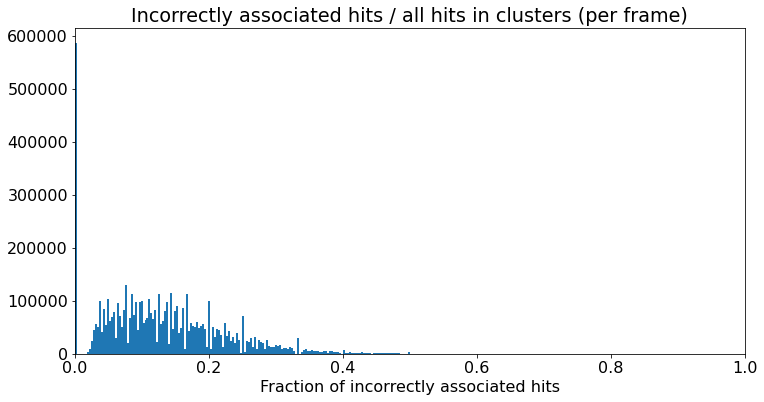

In [44]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame_spatial, bins = 300)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of incorrectly associated hits")
plt.savefig("incorr_associated_all_30_files_spatial.png", dpi = 300)
plt.show()

#### Hits associated to correct cluster

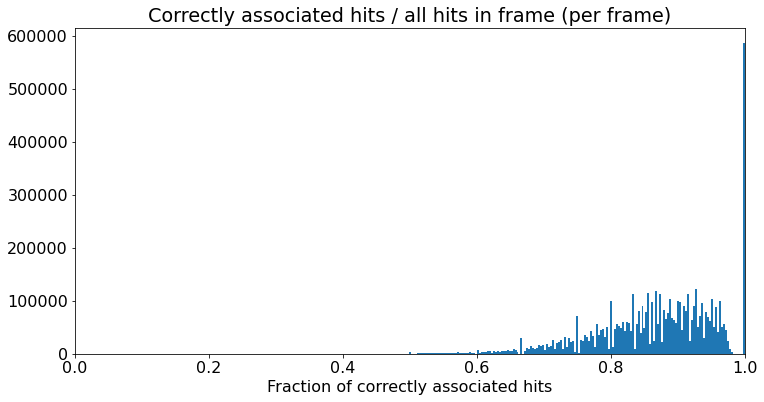

In [45]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame_spatial, bins = 300)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of correctly associated hits")
plt.savefig("corr_associated_all_30_files_spatial.png", dpi = 300)

plt.show()

#### Combined histograms

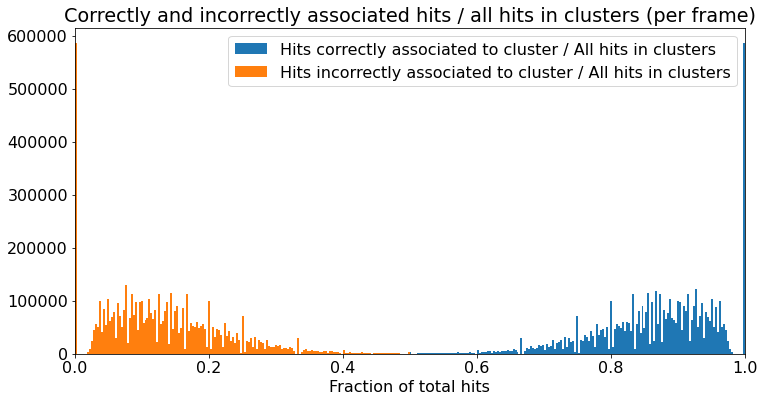

In [46]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame_spatial, bins = 300, label = "Hits correctly associated to cluster / All hits in clusters")
plt.hist(array_frac_uncorr_frame_spatial, bins = 300, label = "Hits incorrectly associated to cluster / All hits in clusters")
plt.title("Correctly and incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of total hits")
plt.legend()
plt.savefig("Corr_and_incorr_fractions_all_30_files_spatial.png", dpi = 300)
plt.show()

### Efficiency vs maximum cluster width

In [47]:
function_str = "mt_efficiency_as_function_of_cluster_width"
cluster_width_array_used = np.arange(10,101,1)
filename_used = "./testdata/sorted/root_files_fixed/mu3e_sorted_000127.root"
args_spatial = (filename_used, time_threshold_used, "big", None, None, "iterativespatial")

clump.multithreading.run_mt(function_str, src_spatial, args_spatial, cluster_width_array = cluster_width_array_used)

-----------------------
Available threads =  8
Used threads =  6
-----------------------
started thread started thread started thread started thread   

In [ ]:
src_cluster_width_spatial    = src_res + "/efficiency_vs_cluster_width_*_iterativespatial.txt"
fnames_cluster_width_spatial = glob(src_cluster_width_spatial)

array_cluster_width_eff_spatial  = []
array_cluster_width_spatial = []
array_cluster_width_tmp_spatial = []
array_cluster_width_tmp_spatial.append([np.loadtxt(f) for f in fnames_cluster_width_spatial])
for i in array_cluster_width_tmp_spatial[0]:
    array_cluster_width_eff_spatial.append(float(i[0]))
    array_cluster_width_spatial.append(float(i[1]))

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.scatter(array_cluster_width_spatial, array_cluster_width_eff_spatial)
plt.xlabel("Maximum distance between clusters [mm]")
plt.ylabel("Efficiency")
plt.title("Efficiency as function of the maximum distance between clusters with same tid")
#plt.savefig("efficiency_vs_max_distance_threshold_10-100_1_all_frames_each_correct.png", dpi=300)
plt.show()